<a href="https://colab.research.google.com/github/shrav-jally/DL_Lab_Sem6/blob/main/DLLabCMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
pip install keras

In [4]:
#upload CMU face dataset to colab
from google.colab import files
uploaded = files.upload()

Saving faces.tar.Z to faces.tar.Z


In [5]:
#install uncompress tool
!apt-get install ncompress

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  ncompress
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 22.0 kB of archives.
After this operation, 58.4 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncompress amd64 4.2.4.6-5 [22.0 kB]
Fetched 22.0 kB in 1s (34.9 kB/s)
Selecting previously unselected package ncompress.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../ncompress_4.2.4.6-5_amd64.deb ...
Unpacking ncompress (4.2.4.6-5) ...
Setting up ncompress (4.2.4.6-5) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
#uncompress z file
!uncompress faces.tar.Z

In [7]:
#extract the tar file
!tar -xvf faces.tar

faces/
faces/an2i/
faces/an2i/an2i_straight_neutral_open.pgm
faces/an2i/an2i_left_neutral_open.pgm
faces/an2i/an2i_right_neutral_open.pgm
faces/an2i/an2i_up_neutral_open.pgm
faces/an2i/an2i_straight_happy_open.pgm
faces/an2i/an2i_left_happy_open.pgm
faces/an2i/an2i_right_happy_open.pgm
faces/an2i/an2i_up_happy_open.pgm
faces/an2i/an2i_straight_sad_open.pgm
faces/an2i/an2i_left_sad_open.pgm
faces/an2i/an2i_right_sad_open.pgm
faces/an2i/an2i_up_sad_open.pgm
faces/an2i/an2i_straight_angry_open.pgm
faces/an2i/an2i_left_angry_open.pgm
faces/an2i/an2i_right_angry_open.pgm
faces/an2i/an2i_up_angry_open.pgm
faces/an2i/an2i_straight_neutral_sunglasses.pgm
faces/an2i/an2i_left_neutral_sunglasses.pgm
faces/an2i/an2i_right_neutral_sunglasses.pgm
faces/an2i/an2i_up_neutral_sunglasses.pgm
faces/an2i/an2i_straight_happy_sunglasses.pgm
faces/an2i/an2i_left_happy_sunglasses.pgm
faces/an2i/an2i_right_happy_sunglasses.pgm
faces/an2i/an2i_up_happy_sunglasses.pgm
faces/an2i/an2i_straight_sad_sunglasses.pgm

In [8]:
#load images properly and extract shape
import numpy as np
import os
from tensorflow.keras.preprocessing import image

dataset_path = "faces"

data = []
labels = []

subjects = sorted(os.listdir(dataset_path))
subject_to_label = {name: idx for idx, name in enumerate(subjects)}

for subject in subjects:
    subject_path = os.path.join(dataset_path, subject)

    # Skip if not a directory
    if not os.path.isdir(subject_path):
        continue

    for img_name in os.listdir(subject_path):
        if img_name.endswith(".pgm"):
            img_path = os.path.join(subject_path, img_name)

            img = image.load_img(img_path, color_mode='grayscale', target_size=(32,30))
            img_array = image.img_to_array(img)

            data.append(img_array)
            labels.append(subject_to_label[subject])

X = np.array(data) / 255.0
y = np.array(labels)

print("Dataset shape:", X.shape)
print("Number of classes:", len(subjects))

Dataset shape: (1872, 32, 30, 1)
Number of classes: 21


In [9]:
import numpy as np
print("Unique labels:", np.unique(y))
print("Max label:", np.max(y))
print("Min label:", np.min(y))
print("Number of unique labels:", len(np.unique(y)))

Unique labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Max label: 20
Min label: 1
Number of unique labels: 20


In [10]:
import numpy as np

# Get unique labels
unique_labels = np.unique(y)

# Create mapping: old_label -> new_label (0 to N-1)
label_mapping = {old: new for new, old in enumerate(unique_labels)}

# Apply mapping
y = np.array([label_mapping[label] for label in y])

# Check again
print("New unique labels:", np.unique(y))
print("Number of classes:", len(np.unique(y)))

New unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Number of classes: 20


In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Ensure NUM_CLASSES is dynamically set based on unique labels found
NUM_CLASSES = len(np.unique(y))

# First split: Train (10%) + Temp (90%)
# We use a very small training set to intentionally cause overfitting
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.90,
    stratify=y,
    random_state=42
)

# Second split: Split the 90% into two equal halves (45% Val, 45% Test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

# One-hot encode
y_train = to_categorical(y_train, NUM_CLASSES)
y_val   = to_categorical(y_val, NUM_CLASSES)
y_test  = to_categorical(y_test, NUM_CLASSES)

print(f"Total samples: {len(X)}")
print(f"Train: {X_train.shape[0]} samples (The model's 'study material')")
print(f"Validation: {X_val.shape[0]} samples (The 'practice exam')")
print(f"Test: {X_test.shape[0]} samples (The 'final exam')")

Total samples: 1872
Train: 187 samples (The model's 'study material')
Validation: 842 samples (The 'practice exam')
Test: 843 samples (The 'final exam')


In [12]:
#raw baseline model
from tensorflow import keras
from tensorflow.keras import layers

# Define the baseline model
baseline_model = keras.Sequential([
    layers.Input(shape=(32, 30, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile
baseline_model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train - this will now use the smaller X_train from your 10/45/45 split
history_baseline = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.0388 - loss: 3.0113 - val_accuracy: 0.0570 - val_loss: 2.9366
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.1383 - loss: 2.9117 - val_accuracy: 0.2767 - val_loss: 2.8402
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.3311 - loss: 2.7864 - val_accuracy: 0.3551 - val_loss: 2.6439
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.3817 - loss: 2.5466 - val_accuracy: 0.4798 - val_loss: 2.3397
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.4944 - loss: 2.2422 - val_accuracy: 0.5487 - val_loss: 1.9815
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6078 - loss: 1.7630 - val_accuracy: 0.5321 - val_loss: 1.6106
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6488 - loss: 1.3251 - val_accuracy: 0.6912 - val_loss: 1.2599
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7253 - loss: 1.0430 - val_accuracy: 0.7494 - val_loss: 1.0

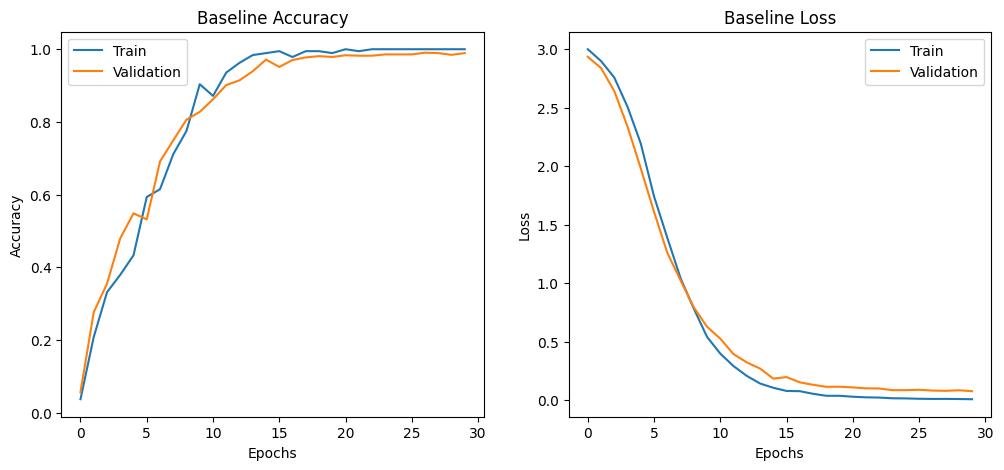

In [13]:
#plotting learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history_baseline.history['accuracy'], label='Train')
plt.plot(history_baseline.history['val_accuracy'], label='Validation')
plt.title("Baseline Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history_baseline.history['loss'], label='Train')
plt.plot(history_baseline.history['val_loss'], label='Validation')
plt.title("Baseline Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


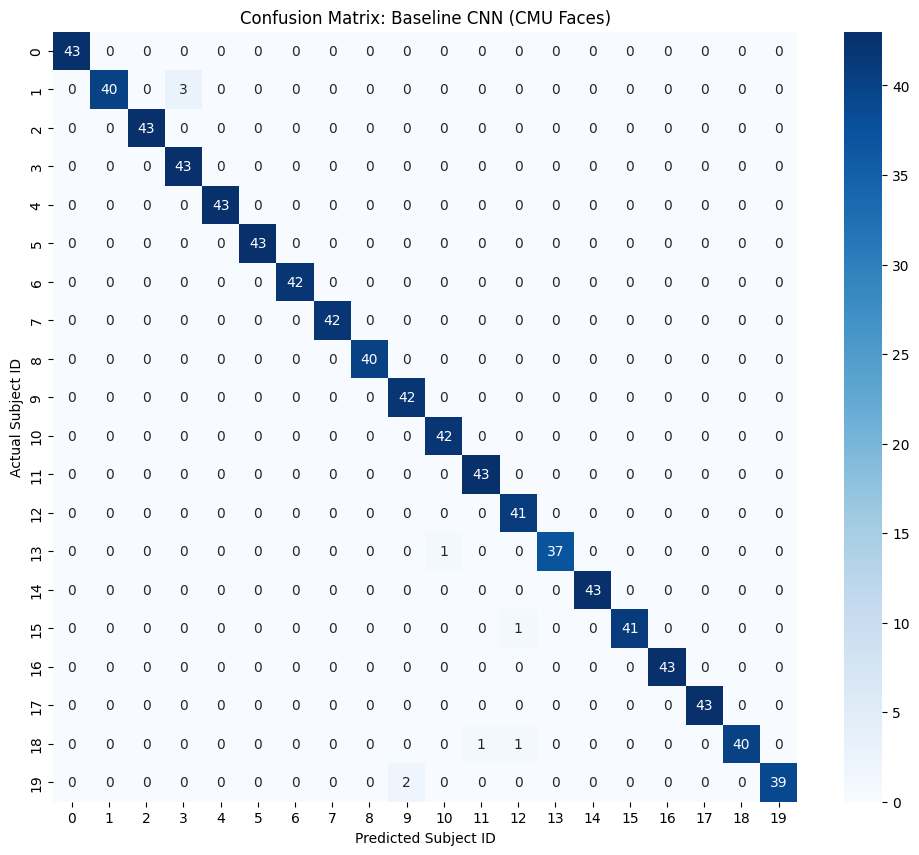

In [14]:
#confusion matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 1. Get the model's raw predictions (probabilities) for the validation set
y_pred_probs = baseline_model.predict(X_val)

# 2. Pick the index of the highest probability as the predicted class
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# 3. Convert your 'y_val' (which is one-hot encoded) back to single integers
y_true_classes = np.argmax(y_val, axis=1)

# 4. Generate the numerical confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 5. Visualize it with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(NUM_CLASSES),
            yticklabels=range(NUM_CLASSES))

plt.title("Confusion Matrix: Baseline CNN (CMU Faces)")
plt.xlabel("Predicted Subject ID")
plt.ylabel("Actual Subject ID")
plt.show()

In [15]:
#experimenting with the learning rate (v low, v high)
def build_and_train(lr_value, experiment_name):
    model = keras.Sequential([
        layers.Input(shape=(32, 30, 1)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr_value),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"\n--- Training Experiment: {experiment_name} (LR={lr_value}) ---")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=32,
        verbose=0 # Keeps the output clean
    )
    return history

# Run the experiments
history_low_lr = build_and_train(0.0001, "Low Learning Rate")
history_high_lr = build_and_train(0.1, "High Learning Rate")


--- Training Experiment: Low Learning Rate (LR=0.0001) ---

--- Training Experiment: High Learning Rate (LR=0.1) ---


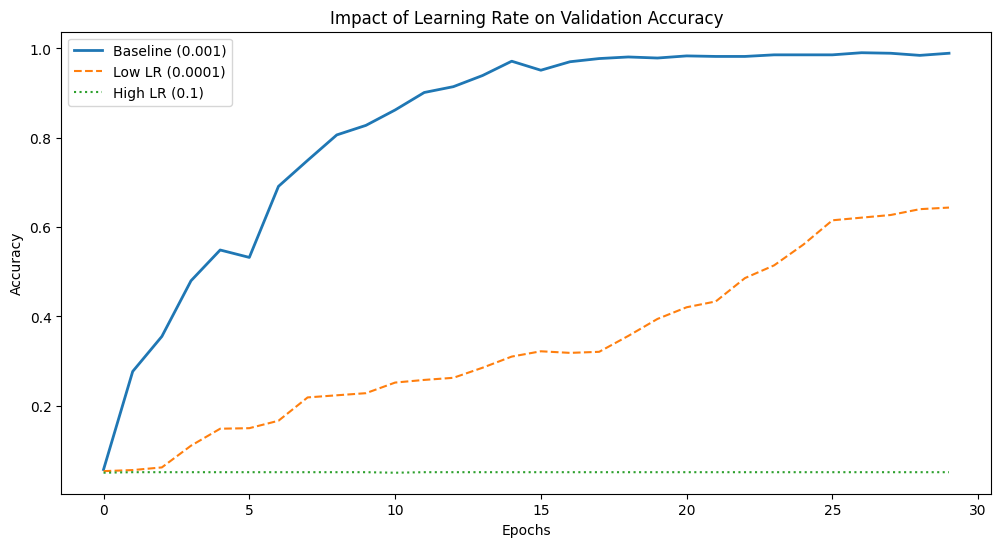

In [16]:
#visualizing difference in learning rate
plt.figure(figsize=(12, 6))

# Plot Baseline (from your previous run)
plt.plot(history_baseline.history['val_accuracy'], label='Baseline (0.001)', linewidth=2)
# Plot Low LR
plt.plot(history_low_lr.history['val_accuracy'], label='Low LR (0.0001)', linestyle='--')
# Plot High LR
plt.plot(history_high_lr.history['val_accuracy'], label='High LR (0.1)', linestyle=':')

plt.title("Impact of Learning Rate on Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
#experimenting with batch size (v low, v high)
def train_with_batch_size(bs_value, experiment_name):
    # Re-build the same architecture to keep it fair
    model = keras.Sequential([
        layers.Input(shape=(32, 30, 1)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(0.001), # Keep LR constant
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"\n--- Training Experiment: {experiment_name} (Batch Size={bs_value}) ---")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=bs_value,
        verbose=0
    )
    return history

# Run the experiments
history_small_batch = train_with_batch_size(8, "Small Batch")
history_large_batch = train_with_batch_size(256, "Large Batch")


--- Training Experiment: Small Batch (Batch Size=8) ---

--- Training Experiment: Large Batch (Batch Size=256) ---


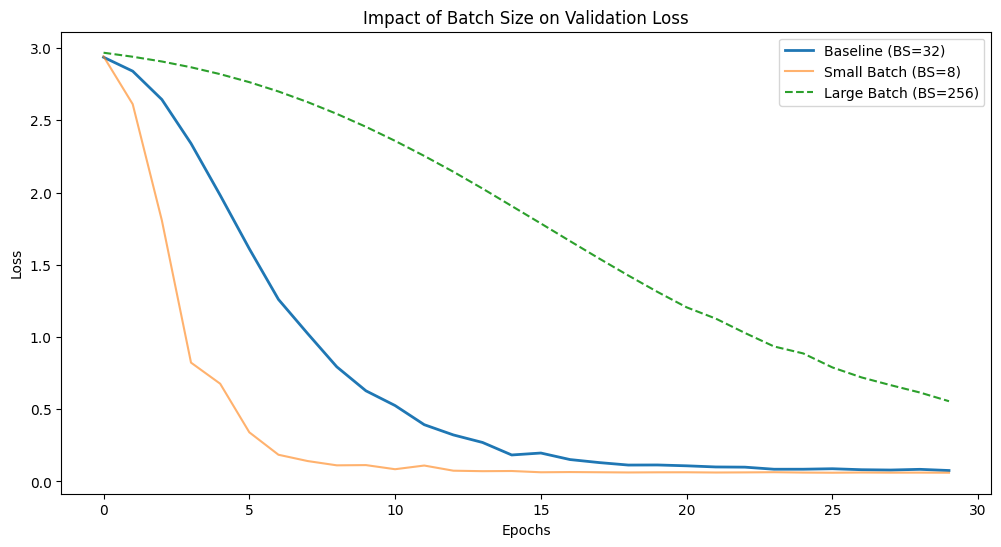

In [18]:
#visualizing difference in batch size
plt.figure(figsize=(12, 6))

# Baseline (32)
plt.plot(history_baseline.history['val_loss'], label='Baseline (BS=32)', linewidth=2)
# Small Batch (8)
plt.plot(history_small_batch.history['val_loss'], label='Small Batch (BS=8)', alpha=0.6)
# Large Batch (256)
plt.plot(history_large_batch.history['val_loss'], label='Large Batch (BS=256)', linestyle='--')

plt.title("Impact of Batch Size on Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
#optimization
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    # Helper to reset the model architecture for each test
    return keras.Sequential([
        layers.Input(shape=(32, 30, 1)),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

# Define the 8 configurations
experiments = [
    {"name": "Batch GD", "opt": keras.optimizers.SGD(0.01), "bs": len(X_train)},
    {"name": "Stochastic GD", "opt": keras.optimizers.SGD(0.01), "bs": 1},
    {"name": "Mini-batch GD", "opt": keras.optimizers.SGD(0.01), "bs": 32},
    {"name": "SGD + Momentum", "opt": keras.optimizers.SGD(0.01, momentum=0.9), "bs": 32},
    {"name": "Nesterov", "opt": keras.optimizers.SGD(0.01, momentum=0.9, nesterov=True), "bs": 32},
    {"name": "AdaGrad", "opt": keras.optimizers.Adagrad(0.01), "bs": 32},
    {"name": "RMSProp", "opt": keras.optimizers.RMSprop(0.001), "bs": 32},
    {"name": "Adam", "opt": keras.optimizers.Adam(0.001), "bs": 32},
]

results = {}

for exp in experiments:
    print(f"Training {exp['name']}...")
    model = get_model()
    model.compile(optimizer=exp['opt'], loss='categorical_crossentropy', metrics=['accuracy'])

    # We train for fewer epochs (e.g., 15) to quickly see the convergence speed
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=15, batch_size=exp['bs'], verbose=0)
    results[exp['name']] = history

Training Batch GD...
Training Stochastic GD...
Training Mini-batch GD...
Training SGD + Momentum...
Training Nesterov...
Training AdaGrad...
Training RMSProp...
Training Adam...


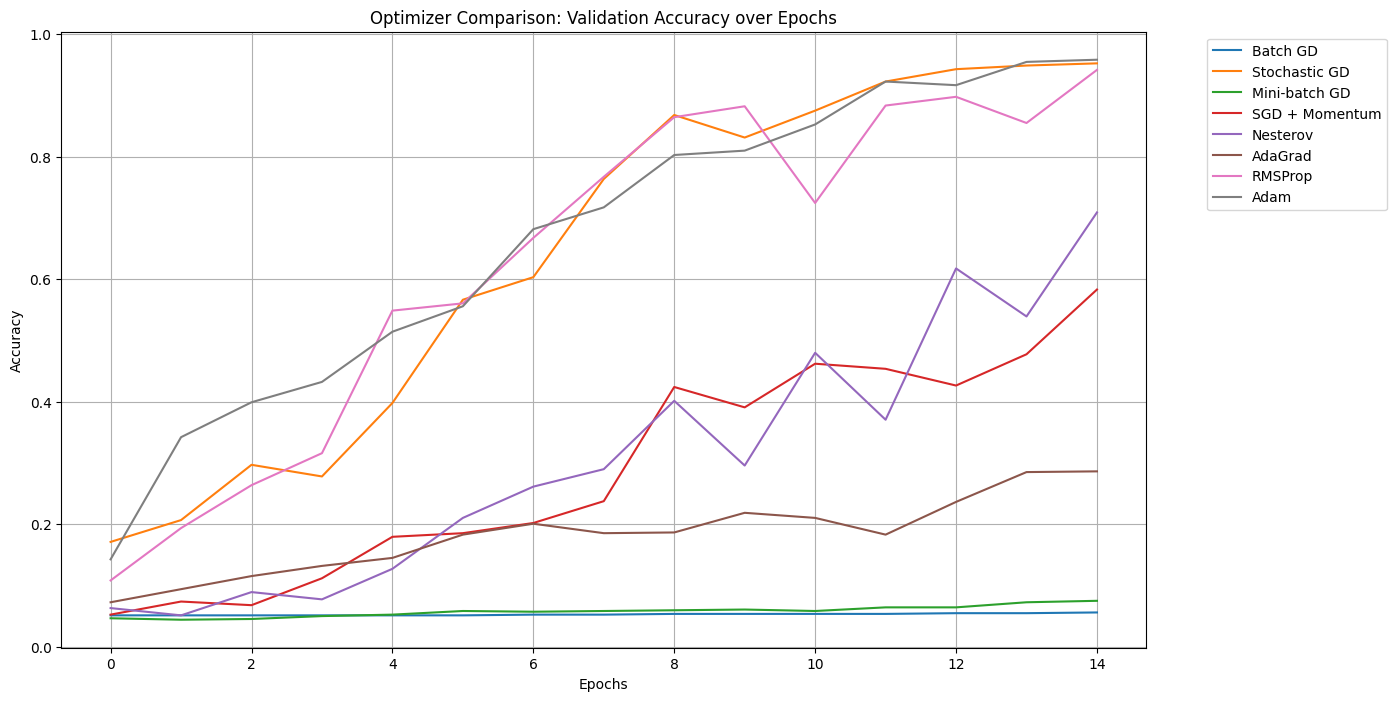

In [20]:
#comparing optimizations
plt.figure(figsize=(14, 8))

for name, history in results.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Optimizer Comparison: Validation Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()